In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [2]:
def binomial(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))

def multinomial(lst,n):
    m = factorial(n)
    for i in lst:
        m *= 1/factorial(i)
    return m

In [3]:
# Dados dos numeros n,m lst retorna todas las tuplas que son soluciones de enteros no negativas a la ecuación
# r1 + r2 + ... + rm = n
def lst(n,m):
    Num_sol = []
    if(n == 0):
        Num_sol = [[0]*m]
    elif(m == 1):
        Num_sol = [[n]]
    else:
        for i in range(n+1):
            arr = []
            c = lst(n-i,m-1)
            for x in c:
                arr.append([i]+x)
            Num_sol = Num_sol + arr
    return Num_sol

#Obtiene vector de posibles enerias del sistema
def get_Us(Num_sol,E_spectrum):
    Us = []
    for sol in Num_sol:
        energy = np.dot(E_spectrum,sol)
        Us.append(energy)
    return Us

In [16]:
#Función que re ordena los estados segun una energia total del sistema.
#micros es un arreglo de areglos, cuyos elementos son de la forma [[n1,n2,...,n_m],...,[r1,r2,...,r_m]], comopartiendo estos
#la misma energia
# Retorna tambien la entropia y el numero de estados W para una energia dada

def get_thermo_var(U,E_spctrm,Num_sol):
    micros = [] #microestado especificado por numeros de ocupacion
    MM = []
    W = 0
    for micro in Num_sol:
        Energy = np.dot(micro,E_spctrm)
        if(Energy == U):
            micros.append(micro)
            W += multinomial(micro,n)
    if(W != 0):
        S = np.log(W)
    else:
        S = -1
    return micros,W,S

#Dado un n ( numero de particulas), y un espectro de enrgia asociado E_spctrm, 
#retorna todos los micorestados, los vectores degeneración Ws, entropia Ss y energia Us
def simulate(n,E_spctrm):
    Num_solutions = lst(n,len(E_spctrm))
    Us = get_Us(Num_solutions, E_spctrm)
    Ss = []
    Ws = []
    Micros_array = []
    for energy in Us:
        micros,W,S = get_thermo_var(energy,E_spctrm,Num_solutions)
        Micros_array.append(micros)
        Ws.append(W)
        Ss.append(S)
    return Micros_array,Ws,Ss,Us

def plot_figures(Us,Ss,Ws):
    fig1,ax1 = plt.subplots()
    ax1.plot(Us,Ws,'o',label = 'W vs U')
    ax1.set_xlabel('U')
    ax1.set_ylabel('W')
    ax1.legend()
    plt.show()
    fig1,ax1 = plt.subplots()
    ax1.plot(Us,Ss,'o',label = 'S vs U')
    ax1.set_xlabel('U')
    ax1.set_ylabel('S')
    ax1.legend()
    plt.show()

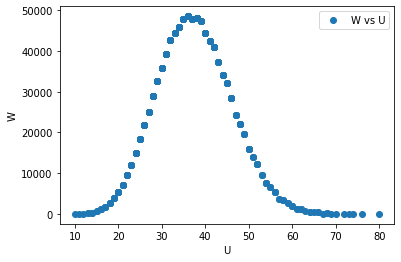

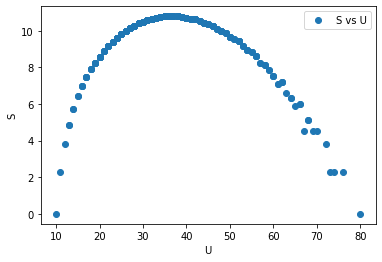

In [17]:
n = 10 #numero de particulas
E_spctrm = [1,2,4,8]
MS,Ws,Ss,Us = simulate(n,E_spctrm)
plot_figures(Us,Ss,Ws)